# Data preparation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt
import pandas_datareader as pd_data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, metrics
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from math import log
from scipy.stats.stats import pearsonr
from scipy import stats
# Suppress warnings
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import seaborn as sns #visualisation
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import math as m

In [2]:
data = pd.read_csv('MLExamData2.csv',sep=",",index_col=0)
from datetime import datetime
data['Timestamp']=pd.to_datetime(data['Timestamp'],unit='s')

In [3]:
data.head(30600)

,Timestamp,Open,High,Low,Close,Volume,Weighted_Price
0,2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,300.000000
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-01 05:38:00,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-01 05:39:00,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-01 05:40:00,300.00,300.00,300.00,300.00,0.010000,300.000000
8,2014-12-01 05:41:00,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-01 05:42:00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data[30593:]

In [5]:
direction=np.empty((len(data),1,))
direction[:] = np.nan
for i in range(len(data)-240):
    if (not pd.isna(data['Weighted_Price'].iloc[i])) and (not pd.isna(data['Weighted_Price'].iloc[i+240])):
            if data['Weighted_Price'].iloc[i] < data['Weighted_Price'].iloc[i+240]:
                direction[i,0]=1
            else:
                direction[i,0]=-1
      

In [6]:
data['direction'] = direction

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
Weighted_Price    0
direction         0
dtype: int64

In [8]:
data.loc[ data['direction'] ==-1 , 'direction']  = 0

In [9]:
data.head(250)

,Timestamp,Open,High,Low,Close,Volume,Weighted_Price,direction
30594,2015-02-01 00:01:00,218.69,218.77,218.69,218.77,4.803120,218.694363,1.0
30595,2015-02-01 00:02:00,218.69,219.00,218.69,219.00,4.876800,218.748834,1.0
30596,2015-02-01 00:03:00,218.77,218.77,218.69,218.69,7.268100,218.717917,1.0
30597,2015-02-01 00:04:00,218.75,218.75,218.60,218.60,0.253900,218.683698,1.0
30598,2015-02-01 00:05:00,218.52,218.52,218.52,218.52,0.030000,218.520000,1.0
30599,2015-02-01 00:06:00,218.52,218.52,218.52,218.52,0.080000,218.520000,1.0
30600,2015-02-01 00:07:00,218.52,218.53,218.52,218.52,1.198400,218.520083,1.0
30601,2015-02-01 00:08:00,218.54,218.54,218.51,218.51,1.492100,218.515707,1.0
30602,2015-02-01 00:09:00,218.51,218.51,218.28,218.28,13.477500,218.392852,1.0
30603,2015-02-01 00:10:00,218.36,218.37,218.36,218.37,5.000000,218.369980,1.0


In [10]:
data.head()

,Timestamp,Open,High,Low,Close,Volume,Weighted_Price,direction
30594,2015-02-01 00:01:00,218.69,218.77,218.69,218.77,4.80312,218.694363,1.0
30595,2015-02-01 00:02:00,218.69,219.00,218.69,219.00,4.87680,218.748834,1.0
30596,2015-02-01 00:03:00,218.77,218.77,218.69,218.69,7.26810,218.717917,1.0
30597,2015-02-01 00:04:00,218.75,218.75,218.60,218.60,0.25390,218.683698,1.0
30598,2015-02-01 00:05:00,218.52,218.52,218.52,218.52,0.03000,218.520000,1.0


,Open,High,Low,Close,Volume,Weighted_Price,direction
Open,1.000000,0.999997,0.999997,0.999996,0.207892,0.999998,0.008065
High,0.999997,1.000000,0.999993,0.999997,0.208488,0.999998,0.008078
Low,0.999997,0.999993,1.000000,0.999997,0.207195,0.999998,0.008063
Close,0.999996,0.999997,0.999997,1.000000,0.207860,0.999999,0.008080
Volume,0.207892,0.208488,0.207195,0.207860,1.000000,0.207827,0.017880
Weighted_Price,0.999998,0.999998,0.999998,0.999999,0.207827,1.000000,0.008067
direction,0.008065,0.008078,0.008063,0.008080,0.017880,0.008067,1.000000


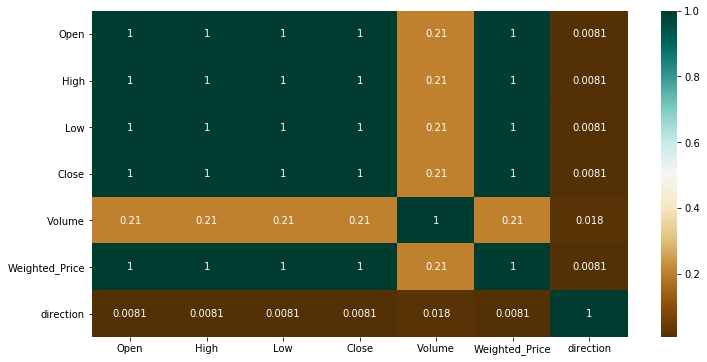

In [11]:
c = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap = 'BrBG')
c

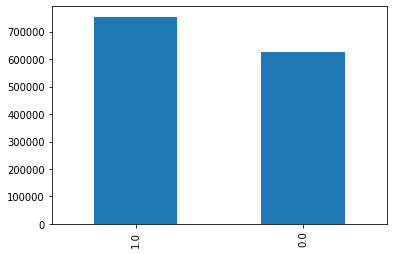

In [12]:
data["direction"].value_counts().plot(kind='bar')

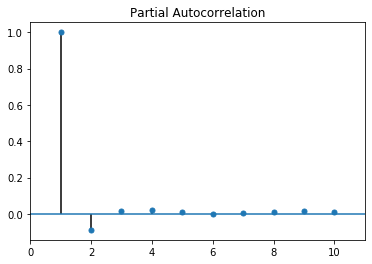

In [13]:
plot_pacf(data['Weighted_Price'], lags=10, zero = False)
plt.show()

In [14]:
data['WP_lag1']= data['Weighted_Price'].shift(1)
data['WP_lag2']= data['Weighted_Price'].shift(2)

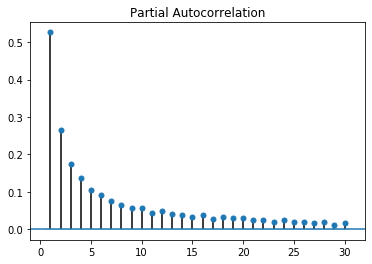

In [15]:
plot_pacf(data['Volume'], lags=30, zero = False)
plt.show()

In [16]:
data['Volume_lag1']= data['Volume'].shift(1)
data['Volume_lag2']= data['Volume'].shift(2)
data['Volume_lag3']= data['Volume'].shift(3)
data['Volume_lag4']= data['Volume'].shift(4)
data['Volume_lag5']= data['Volume'].shift(5)
data['Volume_lag6']= data['Volume'].shift(6)
data['Volume_lag7']= data['Volume'].shift(7)
data['Volume_lag8']= data['Volume'].shift(8)
data['Volume_lag9']= data['Volume'].shift(9)
data['Volume_lag10']= data['Volume'].shift(10)

In [17]:
data.dropna(inplace=True)
data.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
Weighted_Price    0
direction         0
WP_lag1           0
WP_lag2           0
Volume_lag1       0
Volume_lag2       0
Volume_lag3       0
Volume_lag4       0
Volume_lag5       0
Volume_lag6       0
Volume_lag7       0
Volume_lag8       0
Volume_lag9       0
Volume_lag10      0
dtype: int64

,Open,High,Low,Close,Volume,Weighted_Price,direction,WP_lag1,WP_lag2,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7,Volume_lag8,Volume_lag9,Volume_lag10
Open,1.000000,0.999997,0.999997,0.999996,0.207891,0.999998,0.008069,0.999999,0.999995,0.207854,0.207882,0.207932,0.207985,0.208027,0.208068,0.208086,0.208091,0.208109,0.208123
High,0.999997,1.000000,0.999993,0.999997,0.208487,0.999998,0.008082,0.999996,0.999992,0.208332,0.208318,0.208351,0.208392,0.208415,0.208435,0.208438,0.208436,0.208441,0.208454
Low,0.999997,0.999993,1.000000,0.999997,0.207194,0.999998,0.008067,0.999995,0.999991,0.207374,0.207475,0.207552,0.207609,0.207657,0.207692,0.207712,0.207749,0.207781,0.207800
Close,0.999996,0.999997,0.999997,1.000000,0.207859,0.999999,0.008083,0.999994,0.999990,0.207886,0.207939,0.207994,0.208031,0.208080,0.208093,0.208101,0.208109,0.208128,0.208138
Volume,0.207891,0.208487,0.207194,0.207859,1.000000,0.207827,0.017881,0.207907,0.207958,0.526637,0.469035,0.437853,0.423659,0.407417,0.400328,0.390389,0.382998,0.376475,0.373841
Weighted_Price,0.999998,0.999998,0.999998,0.999999,0.207827,1.000000,0.008070,0.999997,0.999993,0.207858,0.207904,0.207960,0.208008,0.208048,0.208072,0.208081,0.208096,0.208115,0.208127
direction,0.008069,0.008082,0.008067,0.008083,0.017881,0.008070,1.000000,0.008071,0.008081,0.017403,0.016549,0.015975,0.015728,0.014728,0.014719,0.014322,0.014016,0.013535,0.013585
WP_lag1,0.999999,0.999996,0.999995,0.999994,0.207907,0.999997,0.008071,1.000000,0.999997,0.207829,0.207860,0.207905,0.207962,0.208010,0.208050,0.208074,0.208080,0.208098,0.208114
WP_lag2,0.999995,0.999992,0.999991,0.999990,0.207958,0.999993,0.008081,0.999997,1.000000,0.207910,0.207831,0.207862,0.207907,0.207964,0.208012,0.208052,0.208073,0.208082,0.208097
Volume_lag1,0.207854,0.208332,0.207374,0.207886,0.526637,0.207858,0.017403,0.207829,0.207910,1.000000,0.526637,0.469035,0.437853,0.423659,0.407417,0.400328,0.390389,0.382998,0.376475


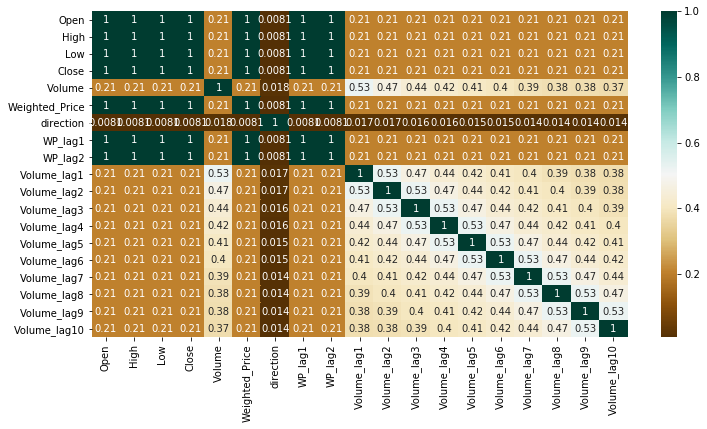

In [18]:
c = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap = 'BrBG')
c

In [19]:
data.loc[ data['direction'] ==-1 , 'direction']  = 0
features=['Volume','Weighted_Price','Volume_lag1', 'Volume_lag2', 'Volume_lag3', 'Volume_lag4', 'Volume_lag5',
         'Volume_lag6', 'Volume_lag7', 'Volume_lag8', 'Volume_lag9', 'Volume_lag10']
X=data[features]
Y=data['direction']

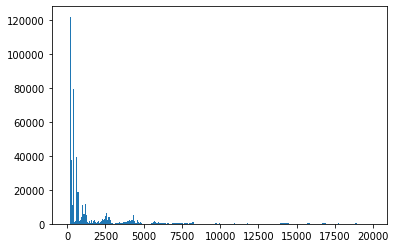

In [20]:
hist= plt.hist(data['Weighted_Price'], bins='auto')  # arguments are passed to np.histogram
plt.show()

In [21]:
P = np.percentile(data["Weighted_Price"], [2.5, 97.5])
data = data[(data["Weighted_Price"] > P[0]) & (data["Weighted_Price"] < P[1])]

In [22]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume,Weighted_Price,direction,WP_lag1,WP_lag2,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7,Volume_lag8,Volume_lag9,Volume_lag10
1563590,2017-12-31 13:57:00,13131.00,13131.01,13131.00,13131.01,2.094035,13131.009268,1.0,13131.003188,13150.112628,1.095545,4.875158,1.582343,4.482250,4.607009,8.306172,6.762080,12.450217,3.711810,9.453998
1563591,2017-12-31 13:58:00,13131.01,13131.01,13131.00,13131.01,1.183870,13131.009361,1.0,13131.009268,13131.003188,2.094035,1.095545,4.875158,1.582343,4.482250,4.607009,8.306172,6.762080,12.450217,3.711810
1563592,2017-12-31 13:59:00,13131.01,13131.01,13131.00,13131.01,7.751497,13131.009871,1.0,13131.009361,13131.009268,1.183870,2.094035,1.095545,4.875158,1.582343,4.482250,4.607009,8.306172,6.762080,12.450217
1563593,2017-12-31 14:00:00,13131.01,13131.01,13131.00,13131.00,8.615343,13131.009558,1.0,13131.009871,13131.009361,7.751497,1.183870,2.094035,1.095545,4.875158,1.582343,4.482250,4.607009,8.306172,6.762080
1563594,2017-12-31 14:01:00,13131.01,13160.00,13131.01,13160.00,4.467993,13146.841741,1.0,13131.009558,13131.009871,8.615343,7.751497,1.183870,2.094035,1.095545,4.875158,1.582343,4.482250,4.607009,8.306172


In [23]:
X_train=X[0:len(data)-131400]
Y_train=Y[0:len(data)-131400]
X_test=X[len(data)-131400:len(data)]
Y_test=Y[len(data)-131400:len(data)]

In [24]:
from sklearn import preprocessing
import numpy as np
x_scaler = MinMaxScaler()
X_train[features] = x_scaler.fit_transform(X_train[features])
X_test[features] = x_scaler.fit_transform(X_test[features])



## Ensemble Model : AdaBoost

In [25]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 50, 100]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = int(m.sqrt(len(features))), max_depth = 3)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 2)
grid_search_ABC.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  6.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=3,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                m

In [26]:
preds =  grid_search_ABC.predict(X_test)
cm  = confusion_matrix(Y_test, preds)

In [27]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tn+fp+fn+tp)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("Accuracy of the model is {:.2f}".format(accuracy))

Recall of the model is 0.98
Precision of the model is 0.54
Accuracy of the model is 0.54


In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "n_estimators": [30, 40], 
              "learning_rate" : [0.1, 0.2],
              "base_estimator__max_depth": [2,3]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = int(m.sqrt(len(features))))

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 2)
grid_search_ABC.fit(X_train,Y_train)
print(grid_search_ABC.best_params_)
print(grid_search_ABC.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.1min


In [ ]:
preds =  grid_search_ABC.predict(X_test)
cm  = confusion_matrix(Y_test, preds)
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tn+fp+fn+tp)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("Accuracy of the model is {:.2f}".format(accuracy))